<a href="https://colab.research.google.com/github/yoojin1699/FoodDetectorTFOD/blob/master/FoodDetectorTFOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.1. Setup Paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': '/content/drive/MyDrive/Data/images',
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [ ]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 0.2. Resize Images

In [ ]:
repo_url = 'https://github.com/yoojin1699/FoodDetector'
import os
%cd /content
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))
!git clone {repo_url}
%cd {repo_dir_path}
!git pull

/content
fatal: destination path 'FoodDetector' already exists and is not an empty directory.
/content/FoodDetector
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/yoojin1699/FoodDetector
   be6e5c3..54f3ff4  master     -> origin/master
Updating be6e5c3..54f3ff4
Fast-forward
 resize_images.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!python resize_images.py --raw-dir "/content/Tensorflow/workspace/images" --ext jpg --target-size "(416,416)"

303 files to resize from directory `/content/Tensorflow/workspace/images` to target size:(416, 416)
................................................................................................................................................Invalid SOS parameters for sequential JPEG
..................................................................................Traceback (most recent call last):
  File "resize_images.py", line 50, in <module>
    img_small = cv2.resize(img, target_size)
cv2.error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 66053, done.
remote: Total 66053 (delta 0), reused 0 (delta 0), pack-reused 66053
Receiving objects: 100% (66053/66053), 575.67 MiB | 26.66 MiB/s, done.
Resolving deltas: 100% (46276/46276), done.


In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 12.2 MB/s 
     |████████████████████████████████| 352 kB 46.8 MB/s 
     |████████████████████████████████| 1.8 MB 50.5 MB/s 
     |██████████████

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Traceback (most recent call last):



In [ ]:
import object_detection

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-10-31 01:30:50--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.184.128, 2a00:1450:400c:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.184.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  25.5MB/s    in 0.8s    

2021-10-31 01:30:52 (25.5 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-

# 2. Create Label Map

In [ ]:
labels = [{'name':'01011001', 'id':1}, {'name':'01012001', 'id':2}, {'name':'01012002', 'id':3}, {'name':'01012003', 'id':4}, {'name':'01012004', 'id':5}, {'name':'01012005', 'id':6}, {'name':'01012006', 'id':7}, {'name':'01013001', 'id':8}, {'name':'01013002', 'id':9}, {'name':'01014001', 'id':10}, {'name':'01014002', 'id':11}, {'name':'01014003', 'id':12}, {'name':'01014004', 'id':13}, {'name':'01014005', 'id':14}, {'name':'01014006', 'id':15}, {'name':'01014007', 'id':16}, {'name':'01014008', 'id':17}, {'name':'01014009', 'id':18}, {'name':'01014010', 'id':19}, {'name':'01014011', 'id':20}, {'name':'01014012', 'id':21}, {'name':'01014013', 'id':22}, {'name':'01015002', 'id':23}, {'name':'01015003', 'id':24}, {'name':'01015004', 'id':25}, {'name':'01015005', 'id':26}, {'name':'01015006', 'id':27}, {'name':'01015007', 'id':28}, {'name':'01015008', 'id':29}, {'name':'01015009', 'id':30}, {'name':'01015010', 'id':31}, {'name':'01015011', 'id':32}, {'name':'01015012', 'id':33}, {'name':'01015013', 'id':34}, {'name':'01015014', 'id':35}, {'name':'01015015', 'id':36}, {'name':'01015016', 'id':37}, {'name':'01015017', 'id':38}, {'name':'01015018', 'id':39}, {'name':'01015019', 'id':40}, {'name':'01016001', 'id':41}, {'name':'01016002', 'id':42}, {'name':'01016003', 'id':43}, {'name':'01016004', 'id':44}, {'name':'01016005', 'id':45}, {'name':'01016006', 'id':46}, {'name':'01016007', 'id':47}, {'name':'01016008', 'id':48}, {'name':'01016009', 'id':49}, {'name':'01016010', 'id':50}, {'name':'01016011', 'id':51}, {'name':'01016012', 'id':52}, {'name':'01016013', 'id':53}, {'name':'01016014', 'id':54}, {'name':'01016015', 'id':55}, {'name':'01016017', 'id':56}, {'name':'01016018', 'id':57}, {'name':'01016019', 'id':58}, {'name':'01016020', 'id':59}, {'name':'02011001', 'id':60}, {'name':'02011002', 'id':61}, {'name':'02011003', 'id':62}, {'name':'02011004', 'id':63}, {'name':'02011005', 'id':64}, {'name':'02011006', 'id':65}, {'name':'02011007', 'id':66}, {'name':'02011008', 'id':67}, {'name':'02011009', 'id':68}, {'name':'02011010', 'id':69}, {'name':'02011011', 'id':70}, {'name':'02011012', 'id':71}, {'name':'02011013', 'id':72}, {'name':'02011014', 'id':73}, {'name':'02011015', 'id':74}, {'name':'02011016', 'id':75}, {'name':'02011017', 'id':76}, {'name':'02011018', 'id':77}, {'name':'02011019', 'id':78}, {'name':'02011020', 'id':79}, {'name':'02011021', 'id':80}, {'name':'02011023', 'id':81}, {'name':'02011024', 'id':82}, {'name':'02011025', 'id':83}, {'name':'02011027', 'id':84}, {'name':'02011028', 'id':85}, {'name':'02011029', 'id':86}, {'name':'02011030', 'id':87}, {'name':'02011031', 'id':88}, {'name':'02011032', 'id':89}, {'name':'02011033', 'id':90}, {'name':'02011034', 'id':91}, {'name':'02011035', 'id':92}, {'name':'02011036', 'id':93}, {'name':'02011037', 'id':94}, {'name':'02011038', 'id':95}, {'name':'02011039', 'id':96}, {'name':'02011040', 'id':97}, {'name':'02012001', 'id':98}, {'name':'02012002', 'id':99}, {'name':'02012003', 'id':100}, {'name':'02012004', 'id':101}, {'name':'02012005', 'id':102}, {'name':'03011001', 'id':103}, {'name':'03011002', 'id':104}, {'name':'03011003', 'id':105}, {'name':'03011004', 'id':106}, {'name':'03011005', 'id':107}, {'name':'03011006', 'id':108}, {'name':'03011007', 'id':109}, {'name':'03011008', 'id':110}, {'name':'03011009', 'id':111}, {'name':'03011010', 'id':112}, {'name':'03011011', 'id':113}, {'name':'03012001', 'id':114}, {'name':'03012002', 'id':115}, {'name':'04011001', 'id':116}, {'name':'04011002', 'id':117}, {'name':'04011003', 'id':118}, {'name':'04011004', 'id':119}, {'name':'04011005', 'id':120}, {'name':'04011006', 'id':121}, {'name':'04011007', 'id':122}, {'name':'04011008', 'id':123}, {'name':'04011010', 'id':124}, {'name':'04011011', 'id':125}, {'name':'04011012', 'id':126}, {'name':'04011013', 'id':127}, {'name':'04011014', 'id':128}, {'name':'04011015', 'id':129}, {'name':'04011016', 'id':130}, {'name':'04012001', 'id':131}, {'name':'04012002', 'id':132}, {'name':'04012003', 'id':133}, {'name':'04012004', 'id':134}, {'name':'04012005', 'id':135}, {'name':'04012006', 'id':136}, {'name':'04012007', 'id':137}, {'name':'04012008', 'id':138}, {'name':'04012009', 'id':139}, {'name':'04012010', 'id':140}, {'name':'04012011', 'id':141}, {'name':'04012012', 'id':142}, {'name':'04012013', 'id':143}, {'name':'04013002', 'id':144}, {'name':'04013003', 'id':145}, {'name':'04013004', 'id':146}, {'name':'04013005', 'id':147}, {'name':'04013006', 'id':148}, {'name':'04013007', 'id':149}, {'name':'04013008', 'id':150}, {'name':'04013009', 'id':151}, {'name':'04013010', 'id':152}, {'name':'04013011', 'id':153}, {'name':'04013012', 'id':154}, {'name':'04013013', 'id':155}, {'name':'04013014', 'id':156}, {'name':'04013015', 'id':157}, {'name':'04013017', 'id':158}, {'name':'04013018', 'id':159}, {'name':'04013019', 'id':160}, {'name':'04013020', 'id':161}, {'name':'04013021', 'id':162}, {'name':'04013022', 'id':163}, {'name':'04013023', 'id':164}, {'name':'04013024', 'id':165}, {'name':'04014001', 'id':166}, {'name':'04015001', 'id':167}, {'name':'04015002', 'id':168}, {'name':'04015003', 'id':169}, {'name':'04016001', 'id':170}, {'name':'04017001', 'id':171}, {'name':'04017002', 'id':172}, {'name':'04018001', 'id':173}, {'name':'04018002', 'id':174}, {'name':'04018003', 'id':175}, {'name':'04018004', 'id':176}, {'name':'04019001', 'id':177}, {'name':'04019002', 'id':178}, {'name':'04019003', 'id':179}, {'name':'04019004', 'id':180}, {'name':'04019005', 'id':181}, {'name':'04019006', 'id':182}, {'name':'04019007', 'id':183}, {'name':'04019008', 'id':184}, {'name':'05011001', 'id':185}, {'name':'05011002', 'id':186}, {'name':'05011004', 'id':187}, {'name':'05011008', 'id':188}, {'name':'05011010', 'id':189}, {'name':'05011011', 'id':190}, {'name':'05011012', 'id':191}, {'name':'05012001', 'id':192}, {'name':'05012002', 'id':193}, {'name':'05012003', 'id':194}, {'name':'05012004', 'id':195}, {'name':'05012005', 'id':196}, {'name':'05013001', 'id':197}, {'name':'06012001', 'id':198}, {'name':'06012002', 'id':199}, {'name':'06012003', 'id':200}, {'name':'06012004', 'id':201}, {'name':'06012005', 'id':202}, {'name':'06012006', 'id':203}, {'name':'06012007', 'id':204}, {'name':'06012008', 'id':205}, {'name':'06012009', 'id':206}, {'name':'06012010', 'id':207}, {'name':'06012011', 'id':208}, {'name':'06012012', 'id':209}, {'name':'06012013', 'id':210}, {'name':'06013001', 'id':211}, {'name':'06013002', 'id':212}, {'name':'06013003', 'id':213}, {'name':'06014001', 'id':214}, {'name':'07011001', 'id':215}, {'name':'07011002', 'id':216}, {'name':'07011003', 'id':217}, {'name':'07011004', 'id':218}, {'name':'07012001', 'id':219}, {'name':'07012002', 'id':220}, {'name':'07012003', 'id':221}, {'name':'07013001', 'id':222}, {'name':'07013002', 'id':223}, {'name':'07013003', 'id':224}, {'name':'07013004', 'id':225}, {'name':'07013005', 'id':226}, {'name':'07013006', 'id':227}, {'name':'07013007', 'id':228}, {'name':'07013008', 'id':229}, {'name':'07013009', 'id':230}, {'name':'07013010', 'id':231}, {'name':'07013011', 'id':232}, {'name':'07013012', 'id':233}, {'name':'07013013', 'id':234}, {'name':'07014001', 'id':235}, {'name':'07014002', 'id':236}, {'name':'07014003', 'id':237}, {'name':'08011001', 'id':238}, {'name':'08011002', 'id':239}, {'name':'08011003', 'id':240}, {'name':'08011004', 'id':241}, {'name':'08011005', 'id':242}, {'name':'08011006', 'id':243}, {'name':'08011007', 'id':244}, {'name':'08011008', 'id':245}, {'name':'08012001', 'id':246}, {'name':'08012002', 'id':247}, {'name':'08012003', 'id':248}, {'name':'08012004', 'id':249}, {'name':'08012005', 'id':250}, {'name':'08012006', 'id':251}, {'name':'08012007', 'id':252}, {'name':'08012008', 'id':253}, {'name':'08012009', 'id':254}, {'name':'08012010', 'id':255}, {'name':'08013001', 'id':256}, {'name':'08013002', 'id':257}, {'name':'08013003', 'id':258}, {'name':'08013004', 'id':259}, {'name':'08013005', 'id':260}, {'name':'08013006', 'id':261}, {'name':'08014001', 'id':262}, {'name':'08014002', 'id':263}, {'name':'08014003', 'id':264}, {'name':'09011001', 'id':265}, {'name':'09011002', 'id':266}, {'name':'09011003', 'id':267}, {'name':'09011004', 'id':268}, {'name':'09011005', 'id':269}, {'name':'09011006', 'id':270}, {'name':'09011007', 'id':271}, {'name':'09011008', 'id':272}, {'name':'09012001', 'id':273}, {'name':'09012002', 'id':274}, {'name':'09013001', 'id':275}, {'name':'09013002', 'id':276}, {'name':'09014001', 'id':277}, {'name':'09014002', 'id':278}, {'name':'09014003', 'id':279}, {'name':'09014004', 'id':280}, {'name':'09015001', 'id':281}, {'name':'09015002', 'id':282}, {'name':'09015003', 'id':283}, {'name':'09016001', 'id':284}, {'name':'10011001', 'id':285}, {'name':'10011002', 'id':286}, {'name':'10011003', 'id':287}, {'name':'10011004', 'id':288}, {'name':'10011005', 'id':289}, {'name':'10012001', 'id':290}, {'name':'10012002', 'id':291}, {'name':'10012003', 'id':292}, {'name':'10012004', 'id':293}, {'name':'10012005', 'id':294}, {'name':'10012006', 'id':295}, {'name':'10012007', 'id':296}, {'name':'10012008', 'id':297}, {'name':'10012009', 'id':298}, {'name':'10014001', 'id':299}, {'name':'10014002', 'id':300}, {'name':'10014003', 'id':301}, {'name':'10014004', 'id':302}, {'name':'10014005', 'id':303}, {'name':'10014006', 'id':304}, {'name':'11011001', 'id':305}, {'name':'11011002', 'id':306}, {'name':'11011003', 'id':307}, {'name':'11011004', 'id':308}, {'name':'11011005', 'id':309}, {'name':'11011006', 'id':310}, {'name':'11011007', 'id':311}, {'name':'11011008', 'id':312}, {'name':'11011009', 'id':313}, {'name':'11011010', 'id':314}, {'name':'11011011', 'id':315}, {'name':'11012001', 'id':316}, {'name':'11012002', 'id':317}, {'name':'11012003', 'id':318}, {'name':'11012004', 'id':319}, {'name':'11013001', 'id':320}, {'name':'11013002', 'id':321}, {'name':'11013003', 'id':322}, {'name':'11013004', 'id':323}, {'name':'11013005', 'id':324}, {'name':'11013006', 'id':325}, {'name':'11013007', 'id':326}, {'name':'11013009', 'id':327}, {'name':'11013010', 'id':328}, {'name':'11013011', 'id':329}, {'name':'11013012', 'id':330}, {'name':'11014001', 'id':331}, {'name':'11014002', 'id':332}, {'name':'11014003', 'id':333}, {'name':'11014004', 'id':334}, {'name':'11014005', 'id':335}, {'name':'11014006', 'id':336}, {'name':'11014007', 'id':337}, {'name':'11014008', 'id':338}, {'name':'11014009', 'id':339}, {'name':'11014010', 'id':340}, {'name':'11015001', 'id':341}, {'name':'11015002', 'id':342}, {'name':'12011001', 'id':343}, {'name':'12011002', 'id':344}, {'name':'12011003', 'id':345}, {'name':'12011004', 'id':346}, {'name':'12011005', 'id':347}, {'name':'12011006', 'id':348}, {'name':'12011007', 'id':349}, {'name':'12011008', 'id':350}, {'name':'12011009', 'id':351}, {'name':'12011010', 'id':352}, {'name':'12011011', 'id':353}, {'name':'12011012', 'id':354}, {'name':'12011013', 'id':355}, {'name':'12011014', 'id':356}, {'name':'12011015', 'id':357}, {'name':'13011001', 'id':358}, {'name':'13011002', 'id':359}, {'name':'13011003', 'id':360}, {'name':'13011004', 'id':361}, {'name':'13011005', 'id':362}, {'name':'13011006', 'id':363}, {'name':'13011007', 'id':364}, {'name':'13011008', 'id':365}, {'name':'13011009', 'id':366}, {'name':'13011010', 'id':367}, {'name':'13011011', 'id':368}, {'name':'13011012', 'id':369}, {'name':'13012001', 'id':370}, {'name':'13012002', 'id':371}, {'name':'14011001', 'id':372}, {'name':'14011002', 'id':373}, {'name':'14011004', 'id':374}, {'name':'14011005', 'id':375}, {'name':'14012001', 'id':376}, {'name':'14012002', 'id':377}, {'name':'15011001', 'id':378}, {'name':'15011002', 'id':379}, {'name':'15011003', 'id':380}, {'name':'15011004', 'id':381}, {'name':'15011005', 'id':382}, {'name':'15011006', 'id':383}, {'name':'15011007', 'id':384}, {'name':'15011008', 'id':385}, {'name':'15011009', 'id':386}, {'name':'15011010', 'id':387}, {'name':'15011011', 'id':388}, {'name':'15011012', 'id':389}, {'name':'15011013', 'id':390}, {'name':'15011014', 'id':391}, {'name':'15011015', 'id':392}, {'name':'15011016', 'id':393}, {'name':'15011017', 'id':394}, {'name':'16011001', 'id':395}, {'name':'16011002', 'id':396}, {'name':'16011003', 'id':397}, {'name':'16011004', 'id':398}, {'name':'16011005', 'id':399}, {'name':'16011006', 'id':400}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
!find /content/Tensorflow/workspace/images/train -name "*.*" | xargs grep "00000000"

In [ ]:
!cd /content/Tensorflow/workspace/images/train | rm -f `grep "01015009" * -l`

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
#!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

# 4. Copy Model Config to Training Folder

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_2 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_2/pipeline.config --num_train_steps=2000


In [ ]:
!{command}

2021-10-30 13:42:35.504686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:42:35.514310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:42:35.515268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:42:35.516771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:42:35.517584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [ ]:
!{command}

2021-10-30 13:36:00.952842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:36:01.011879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:36:01.012993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
W1030 13:36:01.027657 139856447874944 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1030 13:36:01.027966 139856447874944 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat

# 8. Load Train Model From Checkpoint

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [ ]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '1.jpeg')

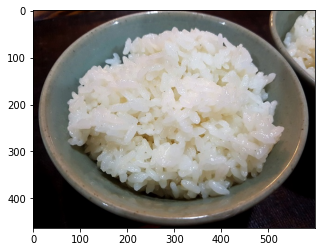

In [ ]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.0,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [ ]:
!{command}

2021-10-30 13:51:13.898662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:51:13.919738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:51:13.920622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:51:13.930586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:51:13.931554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 2.3 MB/s 


In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [ ]:
!{command}

2021-10-30 13:52:28.414274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:52:28.425623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:52:28.426494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:52:28.427829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:52:28.428749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [ ]:
!{command}

2021-10-30 13:53:02.463139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:53:02.472997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:53:02.473905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:53:02.483839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:53:02.484675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet_2/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet_2/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [ ]:
!{command}

2021-10-30 13:54:02.960060: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-30 13:54:02.987485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 13:54:02.988408: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-30 13:54:03.003666: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-30 13:54:03.204682: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-30 13:54:03.216385: I tensorflow/stream_executor/plat

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}